# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

In [1]:
import warnings #из-за обновления библиотек имеется предупреждение о неполной совместимости некоторых
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\User\Desktop\Python\2 курс\ноутбуки и данные 2 курс')

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

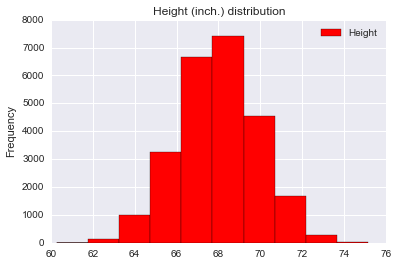

In [4]:
data.plot(y='Height', kind='Hist', color='red', 
          title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [5]:
data.head(5)# так как нумерация строк начинается с нуля, а значения 'Index'- с 1, то произлошел сдвиг колоники на 1 вниз

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


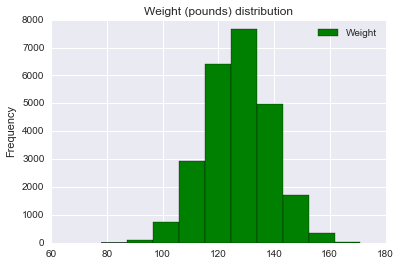

In [6]:
data.plot(y='Weight', kind='Hist', color='green',
          title='Weight (pounds) distribution')

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis = 1)

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

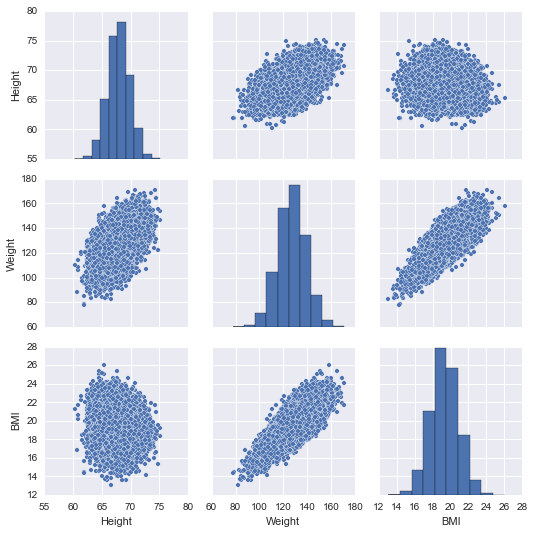

In [9]:
sns.pairplot(data)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

In [10]:
data['weight_category'] = data['Weight'].apply(lambda x: 1 if x < 120 else (3 if x >= 150 else 2))
# вместо предложенной функции использовал lambda-функцию

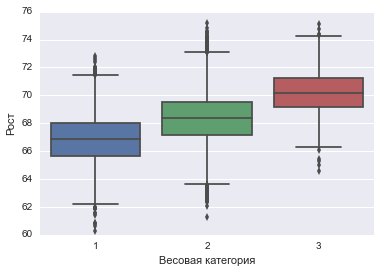

In [11]:
ax = sns.boxplot(x=data.weight_category, y=data.Height)
ax.set_xlabel('Весовая категория')
ax.set_ylabel('Рост')
plt.show()

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

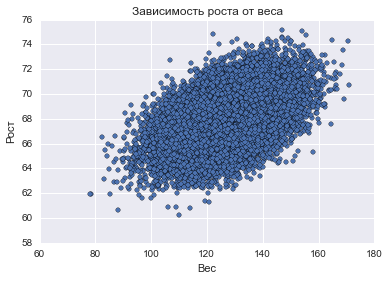

In [12]:
scat = data.plot(x='Weight', y='Height', kind='scatter',
                 title='Зависимость роста от веса')
scat.set_xlabel('Вес')
scat.set_ylabel('Рост')
plt.show()

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [13]:
def error(w0, w1): # далее будет использоваться такая же функция без цикла
    y=data.Height.values
    x=data.Weight.values
    summa = 0
    for i in np.arange(0, len(y)):
        summa += (y[i] - (w0 + w1*x[i]))**2
    return summa

In [14]:
print(error(w0 = 60, w1 = 0.05))

138197.379428


Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

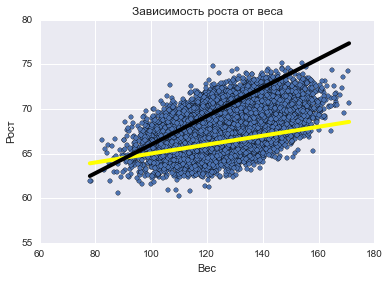

In [15]:
scat = data.plot(x='Weight', y='Height', kind='scatter',
                 title='Зависимость роста от веса')
scat.set_xlabel('Вес')
scat.set_ylabel('Рост')

x1 = np.linspace(data.Weight.min(), data.Weight.max(), len(data.Weight))
y1 = 60 + 0.05*x1
plt.plot(x1, y1, color='yellow', lw = 4)

x2 = np.linspace(data.Weight.min(), data.Weight.max(), len(data.Weight))
y2 = 50 + 0.16*x2
plt.plot(x2, y2, color='black', lw = 4)

plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

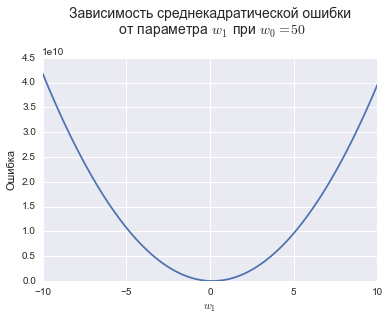

In [16]:
er = np.vectorize(error)
x = np.linspace(-10,10, 100)
plt.plot(x, er(50, x))
plt.ylabel('Ошибка')
plt.xlabel('$w_1$')
plt.title('Зависимость среднекадратической ошибки\n от параметра $w_1$ при $w_0=50$\n', fontsize = 14)
plt.show()

Или сделаем то же самое другим способом (цикл через цикл T_T)

In [17]:
epsilon = []
for i in np.arange(-10, 10, 0.1):
    epsilon.append(error(w0=50, w1=i))

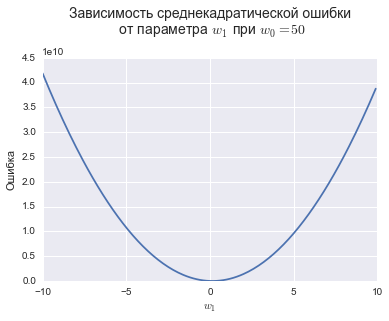

In [18]:
plt.plot(np.arange(-10, 10, 0.1), epsilon)
plt.ylabel('Ошибка')
plt.xlabel('$w_1$')
plt.title('Зависимость среднекадратической ошибки\n от параметра $w_1$ при $w_0=50$\n', fontsize = 14)
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [19]:
from scipy.optimize import  minimize_scalar
new_error = lambda w1: error(50, w1)
res = minimize_scalar(new_error, bounds=(-5,5), method='Bounded')
res.x

0.14109203728834441

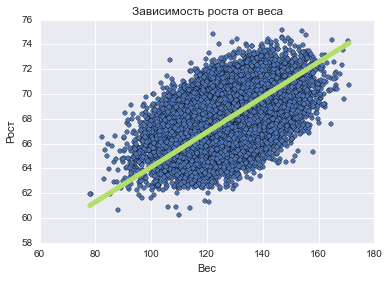

In [20]:
scat = data.plot(x='Weight', y='Height', kind='scatter',
                 title='Зависимость роста от веса')
scat.set_xlabel('Вес')
scat.set_ylabel('Рост')

x = np.linspace(data.Weight.min(), data.Weight.max(), len(data.Weight))
y = 50 + res.x*x
plt.plot(x, y, color='#b3de69', lw = 5)
plt.show()

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [21]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

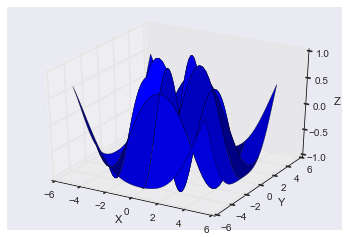

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

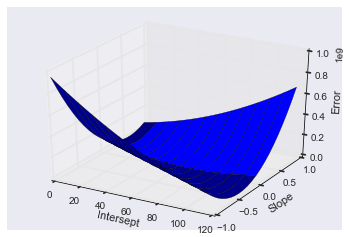

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
w0 = np.arange(0, 120, 1)
w1 = np.arange(-1, 1, 0.1)
w0, w1 = np.meshgrid(w0, w1)
epsilon = error(w0, w1)
surf = ax.plot_surface(w0, w1, epsilon)
ax.set_xlabel('Intersept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [24]:
def er(w):
    y=data.Height.values
    x=data.Weight.values
    summa = sum((y - (w[0] + w[1]*x))**2)
    return summa

In [25]:
from scipy.optimize import minimize
x0 = [0.0, 0.0]
bnds = ((-100, 100), (-5, 5))
res = minimize(er, x0 = x0, bounds = bnds, method='L-BFGS-B')
res.x

array([ 57.57180303,   0.08200628])

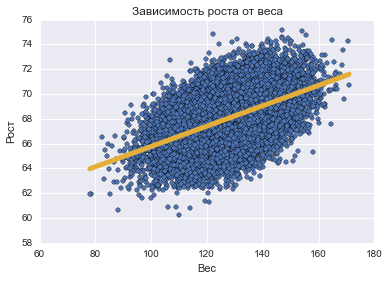

In [26]:
scat = data.plot(x='Weight', y='Height', kind='scatter',
                 title='Зависимость роста от веса')
scat.set_xlabel('Вес')
scat.set_ylabel('Рост')

x = np.linspace(data.Weight.min(), data.Weight.max(), len(data.Weight))
y = res.x[0] + res.x[1]*x
plt.plot(x, y, color='#e5ae38', lw = 5)
plt.show()